In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [17]:
#===== CONSTANTS ======
FINAL_RESOLUTION = (224, 224)
DEBUG_IMAGE_PATH = './data/novi_detection_debug2.jpg'

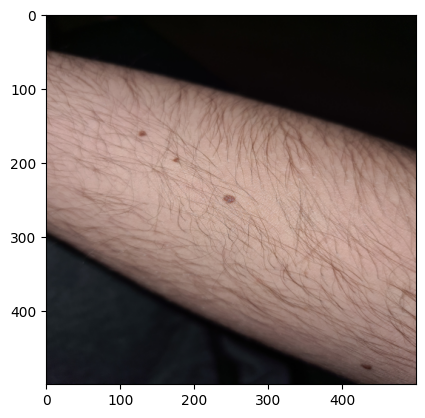

In [40]:
image_color = cv2.imread(DEBUG_IMAGE_PATH, cv2.IMREAD_COLOR)
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
image_gray = cv2.imread(DEBUG_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

zoom_factor = 5
image_color = cv2.resize(image_color, None, fx=zoom_factor, fy=zoom_factor, interpolation = cv2.INTER_LINEAR)
image_gray = cv2.resize(image_gray, None, fx=zoom_factor, fy=zoom_factor, interpolation = cv2.INTER_LINEAR)

image_color = cv2.resize(image_color, (500, 500), interpolation = cv2.INTER_AREA)
image_gray = cv2.resize(image_gray, (500, 500), interpolation = cv2.INTER_AREA)

plt.imshow(image_color)

#Add gaussion blur
image_gray = cv2.GaussianBlur(image_gray,(9,9),cv2.BORDER_DEFAULT)

#Obtaining threshold
ret, th = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(image_gray)

#Find circles
circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1, image_gray.shape[0],
                           param1=30,
                           param2=50,
                           minRadius=0,
                           maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(image_color, center, 1, (0, 100, 100), 3)
        radius = i[2]
        cv2.circle(image_color, center, radius, (255, 0, 255), 3)

plt.imshow(image_color)